## Set up

In [1]:
%%capture
!pip install tensorflow
!pip install gdown
!pip install transformers

In [2]:
import numpy as np
import pandas as pd
import os

import torch
from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
import random

import gdown

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score

In [3]:
def set_seed(seed: int):
    """
    Helper function for reproducible behavior to set the seed in ``random``, ``numpy``, ``torch`` and/or ``tf`` (if
    installed).

    Args:
        seed (:obj:`int`): The seed to set.
    """
    random.seed(seed)
    np.random.seed(seed)
    if is_torch_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        # ^^ safe to call this function even if cuda is not available
    if is_tf_available():
        import tensorflow as tf

        tf.random.set_seed(seed)
SEED = 42
set_seed(SEED)

## Data

In [4]:
REMOTE_MODEL_FOLDER = 'https://drive.google.com/drive/folders/1v_eKiOtzGZoqz3o1HpN9c26UdKQ8lECM?usp=sharing'
LOCAL_MODEL_FOLDER = 'Codalab_Online_Orders'

In [5]:
gdown.download_folder(url=REMOTE_MODEL_FOLDER, output=LOCAL_MODEL_FOLDER, quiet=True)

['Codalab_Online_Orders/input_data.csv',
 'Codalab_Online_Orders/public_data.csv']

In [6]:
training_data_path = os.path.join(LOCAL_MODEL_FOLDER, 'public_data.csv')
testing_data_path = os.path.join(LOCAL_MODEL_FOLDER, 'input_data.csv')

In [7]:
train_df = pd.read_csv(training_data_path)
print(train_df.info())
print(train_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11623 entries, 0 to 11622
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       11623 non-null  int64 
 1   message  11623 non-null  object
 2   label    11623 non-null  object
dtypes: int64(1), object(2)
memory usage: 272.5+ KB
None
      id                                            message  \
0   8793    hi i want change my address from my credit card   
1   3083  i need 4 fruit maple oatmeal 3 cold brew froze...   
2   5932        i wish to travel next month domestic airway   
3  12077                   i need reimbursement my expenses   
4   6608              i need a copy of insurance for my car   

                 label  
0        updateaddress  
1     orderdrinkintent  
2           bookflight  
3        expensereport  
4  getproofofinsurance  


## Text & Label EDA

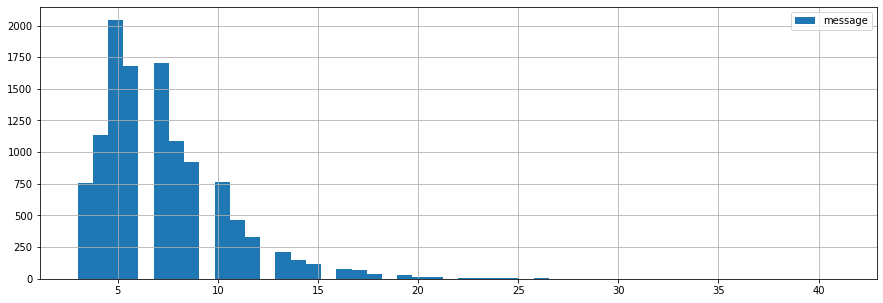

In [8]:
train_df['message'].str.split().map(lambda x: len(x)).hist(bins=50, figsize=(15,5), legend=True);

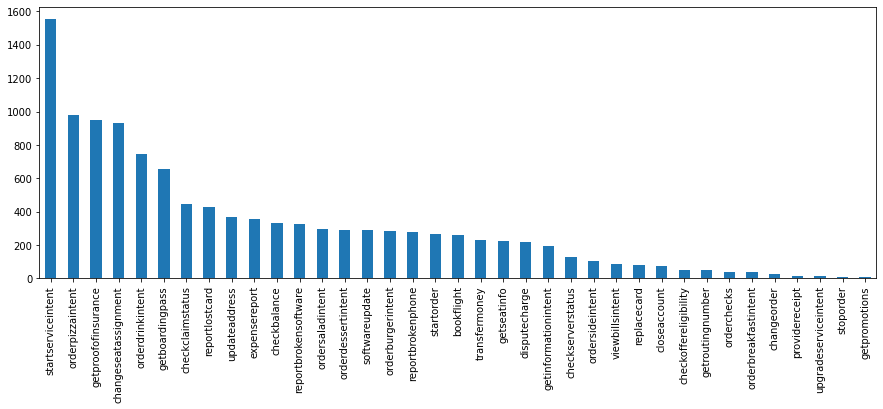

In [9]:
train_df.label.value_counts().plot(kind='bar', figsize=(15,5));

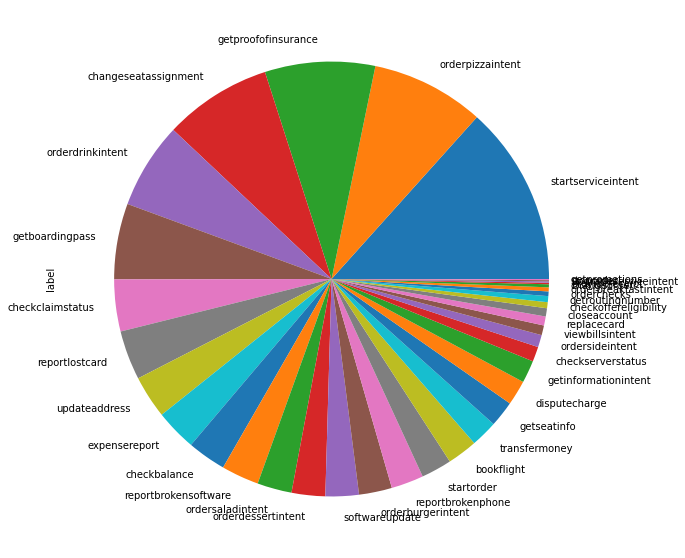

In [10]:
train_df.label.value_counts().plot(kind='pie', figsize=(30,10));

## Data Cleaning/Preprocessing

## Text Vectorization

## Model Building

## Hyperparameters Tuning

## Predictions

In [11]:
df_test = pd.read_csv(testing_data_path)
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       2906 non-null   int64 
 1   message  2906 non-null   object
dtypes: int64(1), object(1)
memory usage: 45.5+ KB


,id,message
0,12123,i have problem in excel
1,244,i need \t pesto drizzle over grilled chicken c...
2,8221,need to help order a new card as the old one e...
3,12856,i need internet plan
4,12108,my are report travel


## Model Submission